To provide guidance I have included some starter code on how to access the levels.fyi API. From here you should be able to do some wrangling to investiagte some interesting insights.

In [34]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [35]:
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
job_data = pd.DataFrame(data)

In [36]:
job_data.columns  

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber'],
      dtype='object')

To give context levels.fyi is a website where inviduals regardless of gender provide information around their current job offer compensation packages within the technology industry.

Not all people within the website will be engineers however, it should be possible to find information such as; gender, educational level, ethnicity etc...

In [37]:
job_data.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6


In [38]:
job_data.replace('', np.nan, inplace=True)

In [39]:
job_data = job_data.drop(['cityid', 'dmaid','rowNumber'], axis=1)
job_data.info()  # Display the data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      61856 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   43102 non-null  object
 13  otherdetails             40139 non-null  object
dtypes: object(14)
memory usage: 6.7+ MB


In [40]:
job_data['timestamp'] = pd.to_datetime(job_data['timestamp'])
job_data[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']] = job_data[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']].apply(pd.to_numeric)


# Understanding Data Completeness with MissingNo


<AxesSubplot: >

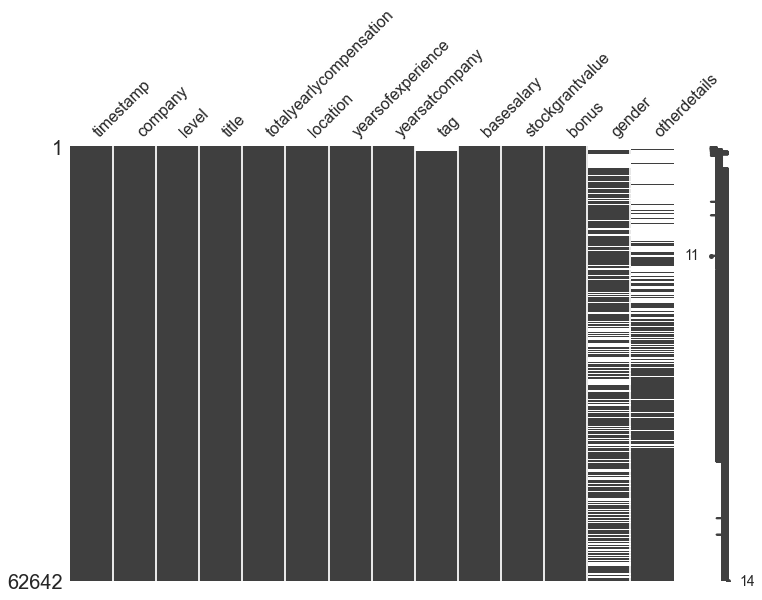

In [41]:
import missingno as msno

msno.matrix(job_data, figsize=(12, 8))

we can see certain features like ‘tag' wasn't9 always required form fills, but became required later. It also shows that ‘otherdetails’ and ‘gender’ weren't always filled. 

# Missing Values


In [42]:
# Check for missing values
job_data.isna().sum()

timestamp                      0
company                        0
level                          0
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          786
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22503
dtype: int64

In [43]:
job_data = job_data[job_data['gender'] != 'Title: Senior Software Engineer']
job_data = job_data.dropna(subset=['gender'])
job_data.isna().sum()

timestamp                      0
company                        0
level                          0
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          307
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                         0
otherdetails               12909
dtype: int64

# Columns

In [44]:
print('gender',job_data['gender'].unique())
print('company',job_data['company'].unique())
print('title',job_data['title'].unique())
print('location',job_data['location'].unique())
print('tag',job_data['tag'].unique())
print('level',job_data['level'].unique())

gender ['Male' 'Female' 'Other']
company ['GE Digital' 'Amazon' 'Uber' ... 'Vizio' 'CarMax'
 'Bankers Healthcare Group']
title ['Software Engineer' 'Product Manager' 'Software Engineering Manager'
 'Data Scientist' 'Solution Architect' 'Product Designer'
 'Hardware Engineer' 'Recruiter' 'Sales' 'Mechanical Engineer'
 'Human Resources' 'Business Analyst' 'Marketing'
 'Technical Program Manager' 'Management Consultant']
location ['San Ramon, CA' 'Seattle, WA' 'San Francisco, CA' 'Redmond, WA'
 'Pleasanton, CA' 'Mountain View, CA' 'San Diego, CA' 'Boston, MA'
 'Bellevue, WA' 'Santa Clara, CA' 'Cupertino, CA' 'New York, NY'
 'Palo Alto, CA' 'Folsom, CA' 'Redwood City, CA' 'Menlo Park, CA'
 'Sunnyvale, CA' 'Richmond, VA' 'Charleston, SC' 'Austin, TX'
 'Hillsboro, OR' 'Moscow, MC, Russia' 'London, EN, United Kingdom'
 'Toronto, ON, Canada' 'Cambridge, EN, United Kingdom' 'Boulder, CO'
 'Jersey City, NJ' 'Vancouver, BC, Canada' 'Pittsburgh, PA'
 'Culver City, CA' 'Mc Lean, VA' 'Chicago, IL' '

In [45]:
print('company:',job_data['company'].value_counts())
print('title',job_data['title'].value_counts())
print('location',job_data['location'].value_counts())
print('tag',job_data['tag'].value_counts())
print('level',job_data['level'].value_counts())

company: Amazon           5478
Microsoft        3607
Google           2969
Facebook         2104
Apple            1376
                 ... 
XILINX              1
Docusign            1
comcast             1
Bloomberg lp        1
Athenahealth        1
Name: company, Length: 1658, dtype: int64
title Software Engineer               28994
Product Manager                  3063
Software Engineering Manager     2302
Data Scientist                   1740
Hardware Engineer                1527
Product Designer                 1143
Technical Program Manager         893
Solution Architect                804
Management Consultant             620
Business Analyst                  527
Marketing                         423
Mechanical Engineer               304
Sales                             280
Recruiter                         274
Human Resources                   207
Name: title, dtype: int64
location Seattle, WA                5800
San Francisco, CA          4319
New York, NY               3102


In [46]:
job_data['location'].unique().size


935

# years of experience vs. Senior Software Engineer

In [103]:
job_data[(job_data['level']=='Senior Software Engineer') &(job_data['gender']== 'Female')  ]['yearsofexperience'].value_counts()

3     16
6     12
2     11
4     10
5      9
7      9
1      8
9      6
8      6
10     4
11     4
12     4
13     4
15     4
16     1
18     1
26     1
Name: yearsofexperience, dtype: int64

In [104]:
job_data[(job_data['level']=='Senior Software Engineer') &(job_data['gender']== 'Male') ]['yearsofexperience'].value_counts()

4     113
5      94
7      94
3      82
6      75
2      61
8      49
9      48
10     47
11     31
13     31
12     26
15     19
18     14
1      14
16     11
14     11
17     10
19      6
20      6
22      5
30      3
27      3
26      2
36      2
0       2
25      2
23      2
24      1
28      1
29      1
21      1
37      1
Name: yearsofexperience, dtype: int64

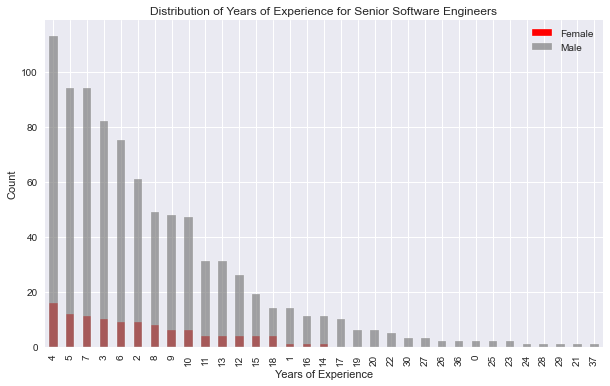

In [108]:
import matplotlib.pyplot as plt

# Filter the data for female and male Senior Software Engineers and count the occurrences of each year of experience
female_senior_se_data = job_data[(job_data['level'] == 'Senior Software Engineer') & (job_data['gender'] == 'Female')]
male_senior_se_data = job_data[(job_data['level'] == 'Senior Software Engineer') & (job_data['gender'] == 'Male')]

female_year_of_experience_counts = female_senior_se_data['yearsofexperience'].value_counts()
male_year_of_experience_counts = male_senior_se_data['yearsofexperience'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
female_year_of_experience_counts.plot(kind='bar', color='red', label='Female')
male_year_of_experience_counts.plot(kind='bar', color='grey', alpha=0.7, label='Male')

plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience for Senior Software Engineers')
plt.legend()

plt.show()


# The US

Given that most of our data are recorded from US based employees, we have narrowed our focus on only the US data

In [49]:
# Define a list of state abbreviations
us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
             'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
             'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# Filter the DataFrame to keep data from the USA only
df_usa = job_data[job_data['location'].str.contains('|'.join(us_states))]

# Verify the filtered DataFrame
df_usa


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails
438,2018-04-12 16:15:32,GE Digital,Senior,Software Engineer,132,"San Ramon, CA",4,2,NaN,124,0,8,Male,NaN
439,2018-04-12 23:19:33,Amazon,L5,Software Engineer,180,"Seattle, WA",13,1,NaN,163,17,0,Male,whuesh physauebs
440,2018-04-13 06:32:17,Uber,L5,Software Engineer,306,"San Francisco, CA",9,2,NaN,159,128,19,Male,NaN
442,2018-04-13 16:28:03,Microsoft,61,Software Engineer,158211,"Redmond, WA",6,3,NaN,144388,5357,8466,Male,triesh qioys caiary grents mcclaasp scoopt dwi...
445,2018-04-14 13:05:22,Microsoft,60,Software Engineer,194,"Seattle, WA",4,0,NaN,173,6,15,Male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62635,2021-08-17 07:50:25,Raytheon Technologies,P2,Software Engineer,125,"Portsmouth, RI",4,2,Distributed Systems (Back-End),122,0,3,Male,szes skauns frairt struisly krauerr pfurf bloo...
62637,2021-08-17 08:16:36,Amazon,L6,Product Manager,272,"Seattle, WA",7,0,Analytic,176,51,45,Female,scrielt schwists fuech xauem typaiarty siids q...
62638,2021-08-17 08:22:17,Fidelity Investments,L3,Software Engineer,50,"Durham, NC",0,0,Full Stack,43,0,7,Male,pauss jiusts liaop rhiitts proing smiodly splu...
62639,2021-08-17 08:24:56,Cisco,Grade 8,Software Engineer,200,"San Jose, CA",3,6,Networking,179,7,14,Male,triasm froidy peusk juieck skaorr


In [50]:
df_usa = df_usa[df_usa['totalyearlycompensation'].between(df_usa['totalyearlycompensation'].quantile(.05),df_usa['totalyearlycompensation'].quantile(.95))]

# Analyze gender representation across job levels

In [51]:
# Analyze gender representation across job levels
gender_counts = df_usa['gender'].value_counts()
print(gender_counts)
# Analyze salary gaps between genders
gender_salary_comparison = df_usa.groupby('gender')['basesalary'].mean()
print(gender_salary_comparison)


Male      26242
Female     5751
Other       298
Name: gender, dtype: int64
gender
Female    143.403060
Male      149.103384
Other     154.073826
Name: basesalary, dtype: float64


In [52]:
gender_average = df_usa.groupby('gender')['title'].value_counts(normalize=True)
print(gender_average)


gender  title                       
Female  Software Engineer               0.514693
        Product Manager                 0.127282
        Product Designer                0.077030
        Data Scientist                  0.051991
        Technical Program Manager       0.038428
        Marketing                       0.031125
        Software Engineering Manager    0.028343
        Hardware Engineer               0.024865
        Recruiter                       0.023648
        Business Analyst                0.020692
        Management Consultant           0.019127
        Human Resources                 0.017736
        Sales                           0.010607
        Solution Architect              0.008172
        Mechanical Engineer             0.006260
Male    Software Engineer               0.700671
        Product Manager                 0.062762
        Software Engineering Manager    0.049806
        Hardware Engineer               0.042985
        Data Scientist          

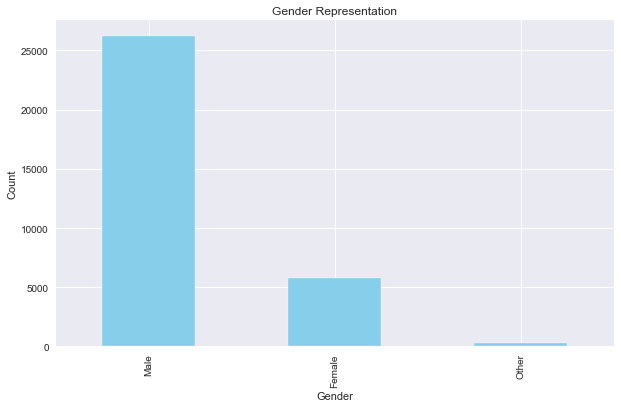

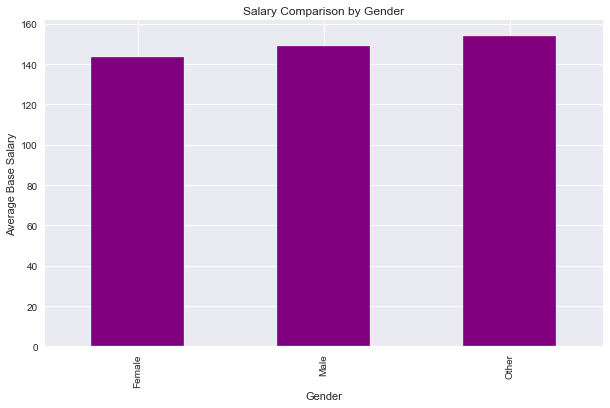

In [53]:
# Create visualizations
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Representation')
plt.show()

plt.figure(figsize=(10, 6))
gender_salary_comparison.plot(kind='bar', color='purple')
plt.xlabel('Gender')
plt.ylabel('Average Base Salary')
plt.title('Salary Comparison by Gender')
plt.show()

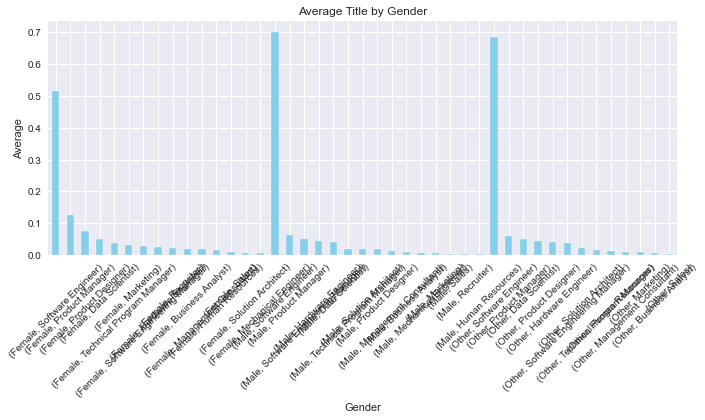

In [54]:
plt.figure(figsize=(10, 6))
gender_average.plot(kind='bar', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Average')
plt.title('Average Title by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# more specific plots to reveal the imapct of years spent at a company vs. total yearly compensation

Text(0.5, 1.0, "Product Manager's Years of Experience Across Companies")

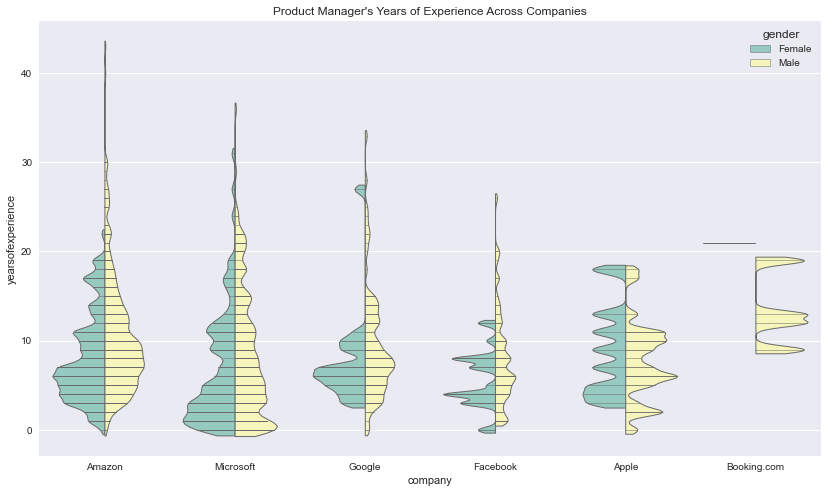

In [88]:
#advanced visualization to transform the data and graph in a violin plot

faang = df_usa.query("company in ('Facebook','Amazon','Apple','Microsoft','Google','Booking.com') and gender in ('Female','Male') and title in ('Product Manager')")

plt.figure(figsize=(14, 8))
g = sns.violinplot(data=faang, palette="Set3", split = True, x='company',hue='gender',y='yearsofexperience',
                   inner='stick', bw=.1, cut=1, linewidth=1)
plt.title('Product Manager\'s Years of Experience Across Companies')

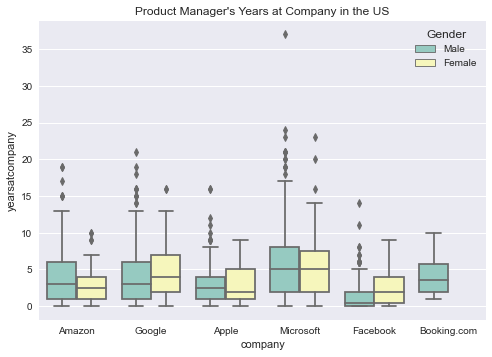

In [100]:
g = sns.boxplot(data=faang, palette="Set3", x='company', hue='gender', y='yearsatcompany')
plt.title('Product Manager\'s Years at Company in the US')
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, title="Gender")

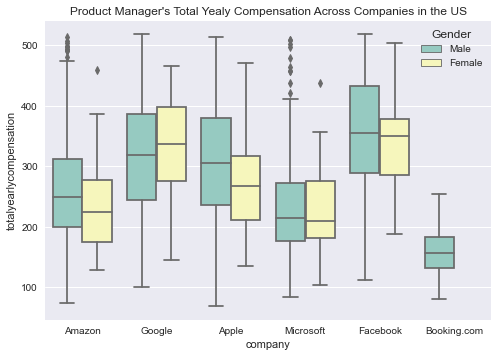

In [99]:
g = sns.boxplot(data=faang, palette="Set3", x='company', hue='gender', y='totalyearlycompensation')
plt.title('Product Manager\'s Total Yealy Compensation Across Companies in the US')
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, title="Gender")

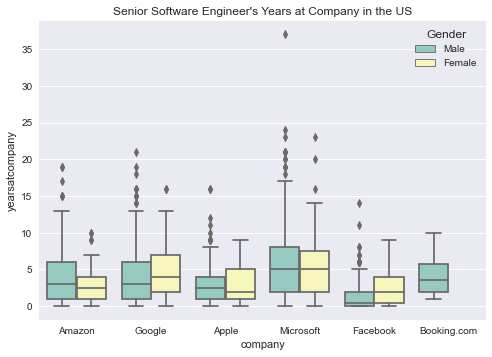

In [101]:
faang2 = df_usa.query("company in ('Facebook','Amazon','Apple','Microsoft','Google','Booking.com') and gender in ('Female','Male') and title in ('Software Engineer') and yearsofexperience>6 and yearsofexperience<20")
g = sns.boxplot(data=faang2, palette="Set3", x='company', hue='gender', y='yearsatcompany')
plt.title('Senior Software Engineer\'s Years at Company in the US')
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, title="Gender")

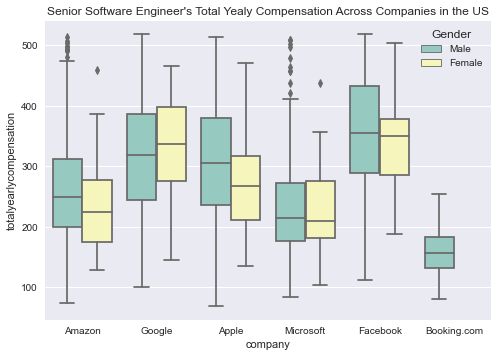

In [102]:
g = sns.boxplot(data=faang2, palette="Set3", x='company', hue='gender', y='totalyearlycompensation')
plt.title('Senior Software Engineer\'s Total Yealy Compensation Across Companies in the US')
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, title="Gender")